# Ad Campaign Hypothesis Testing

by Zachary Greenberg

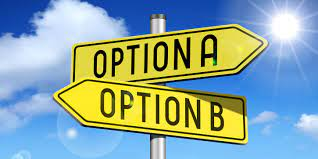

# Overview

***Disclaimer: The data / situation presented in this repository is not real. It has been 100% randomly generated using the Python library, Faker***  

In sales, advertising is an important part in a companies effort to create awareness of products and increase revenue. With the help of Data Science, companies and their advertising departments can assess the effectiveness of their ads as long as there is something to compare them to. For this pretend company below, they have chosen to deploy 2 different advertisments right around the end of September to mid November, aiming to show ads for upcoming holiday sales. Using hypothesis testing, I will investigate the performance of the two ads. 

# Business Understanding

Advertising plays a key role in companies success and revenue. The question is, how would we go about measuring its success? Comparing the effects of two different ads will give companies more of an understanding and allow them to get some sort of tangible measure of effectiveness of the specific ads.

# Data Understanding

The dataset has been randomly generated using the Python library, Faker. ***In the data file, the code generating the data has random seeds set in place to ensure reproducibility.***  

The following columns were created:  

*campaign_start* - the start date/time of the campaign

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/ad_data.csv')

In [4]:
df.head()

,campaign_start,campaign_end,ad_version,age,sex,state,clicked_on_ad,amount_spent
0,2017-08-24 00:54:53,2017-11-14 18:52:28,B,70,M,North Dakota,True,58.95
1,2017-08-14 01:24:06,2017-11-11 05:52:06,B,36,M,Wyoming,True,196.00
2,2017-08-26 16:28:55,2017-11-11 13:05:21,B,75,M,Arizona,True,76.48
3,2017-08-17 23:31:46,2017-11-10 15:58:09,A,85,F,Minnesota,True,102.33
4,2017-08-07 22:08:29,2017-11-11 15:01:02,A,49,F,Colorado,True,17.30


In [13]:
df.shape

(300, 8)

In [5]:
df.dtypes

campaign_start     object
campaign_end       object
ad_version         object
age                 int64
sex                object
state              object
clicked_on_ad        bool
amount_spent      float64
dtype: object

In [6]:
df['campaign_start'] = pd.to_datetime(df['campaign_start'])
df['campaign_end'] = pd.to_datetime(df['campaign_end'])

In [8]:
df['clicked_on_ad'] = np.where(df['clicked_on_ad'] == True, 1, 0)

In [11]:
df.describe()

,age,clicked_on_ad,amount_spent
count,300.000000,300.000000,300.000000
mean,51.113333,0.516667,51.822267
std,19.804914,0.500557,64.392648
min,18.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000
50%,51.000000,1.000000,8.135000
75%,69.000000,1.000000,99.555000
max,85.000000,1.000000,199.660000
